In [1]:
# IMPORT REQUIRE ALL LIBARARIES 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import data 

df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
# to check shape of data

print("The shape of data is",df.shape)

The shape of data is (25, 2)


In [4]:
# to check information of all data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
# to check the correlation between dependent variable and independent variable

df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
# to check null values in data 
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

### data visualization
#### let's plot our data point on 2D graph and see if we can manually find the realation between Hourse and Scores 

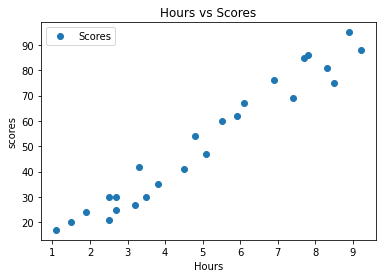

In [7]:
df.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel('scores')
plt.show()


from the above graph we can clearly see that there is  positive reationship between number of hours studied and percentage of scores

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).
i.e dependent and independent variables

In [8]:
# to define dependent and independent variables
x = df.iloc[:,: -1].values
y = df.iloc[:, 1].values

In [9]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

### Spliting tha data set into Train and Test 

now we have  our "attributes" and "labels", now we split the data set into train set and test set for that we will do this by using Scikit-Learn's in biuld train_test_split() method

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =0)

In [12]:
x_train.shape
print(x_test)
y_test.shape
#y_test= np.reshape(y_test, (y_test.shape[0], 1)) 


[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


(5,)

# Now Build The Model

now we split the data into train and test set  now finally it's time to  train our Algorithm 

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
# to check score or accuracy of model
lr.score(x_test,y_test)

0.9454906892105354

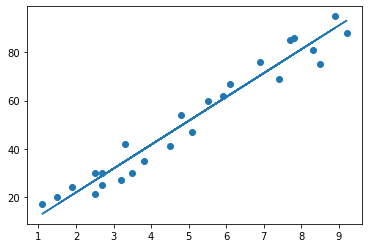

In [15]:
#ploting the regression line

line = lr.coef_*x + lr.intercept_

plt.scatter(x,y)
plt.plot(x,line)
plt.show()

## Making Prediction

In [16]:
y_pred = lr.predict(x_test)

y_pred


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [17]:
y_pred.shape

(5,)

## comparing the actual vs predicted values

In [18]:
df1 = pd.DataFrame({'actual':y_test,'predict':y_pred})
df1

,actual,predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
## let's test the data 
hours = 2.5
test_pred= lr.predict([[hours]])

print('No of hours:- {}'.format(hours))
print('predicted hours:- {}'.format(test_pred))

No of hours:- 2.5
predicted hours:- [26.79480124]


In [20]:
## Final step is to evaluate the performance of the algorithm which we were  usedfor that we used mean_absolute_error()

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:-',
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error:- 4.183859899002982
